# Credit Crad Fraud Detection System On Imbalnced Data

##### Our project is about Credit Card Fraud Detection System. In this project, we will be focusing on detecting fraud transaction happening during plastic purchases. We took our data from Kaggle which contains all the transactions in September 2013 by European customers. The main challenge in our data set is, it is highly unbalanced i.e. the frauds only accounts for 0.172% of the transactions. 
##### This represents the real-world scenario as only a fraction of one percent of all the transactions are fraud.  Therefore, if our model predicts all the transaction as negative (non- fraudulent) it will still have an accuracy of 99%. Which seems like an amazing outcome; however, it does not add any value to the business. Keeping this in mind, we must be careful while checking our results. 
##### Firstly, we will split our data into training and testing so that we could evaluate our model. Secondly, as we are dealing with unbalanced data, we will be using three methods to overcome this issue .i.e. oversampling, undersampling and combined approach. We will try to find the difference between these three approaches and what method best suits our type of data. Thirdly, we will be using Classification model (Random Forest Classification, Naïve Bayes) and SVC to predict the class of the transaction where 0 stands for a genuine transaction/ non-fraudulent and 1 stand for fraud transaction.  Lastly, we will be evaluating our model using confusion matrix and to get more insights we will check the Classification Report for each approach. We will be comparing all the results and reports and will check which method of balancing best suits our model.  


In [1]:
#Importing necessary packages for modelling
import pandas as pd #importing pandas as pd
import numpy as np  #importing numpy as np
from sklearn.model_selection import train_test_split #importing train_test_split from sklearn to split the data
import matplotlib.pyplot as plt #importing for plots
from sklearn.metrics import accuracy_score #imported to check the accuracy
from sklearn.model_selection import GridSearchCV #Imported for Hyperparameters
from imblearn.over_sampling import SMOTE #Imported for Over Sampling
from imblearn.under_sampling import RandomUnderSampler  #Imported for Under Sampling
from imblearn.combine import SMOTEENN #Imported for combined sampling
from sklearn.ensemble import RandomForestClassifier #Used RandomForestClassifier as our algorithm
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler #Imported to scale the features
from sklearn.utils import shuffle 
from sklearn.metrics import confusion_matrix #Imported to checked the confusion matric (Recall and Precision)
from sklearn.metrics import classification_report #Imported to compares all the models and methods
from sklearn.metrics import plot_confusion_matrix #Imported to plot the confusioon matrix
from sklearn.metrics import roc_auc_score #For evaluating 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [4]:
#Reading the data from the read_csv
df1 = pd.read_csv("creditcard.csv")

In [5]:
#checking the Shape of the data
df1.shape

(284807, 31)

In [6]:
#Looking at the data
df1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
#Summarizing the data any checking if the data is scaled
df1.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
#Checking the class (target) balance
df1.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

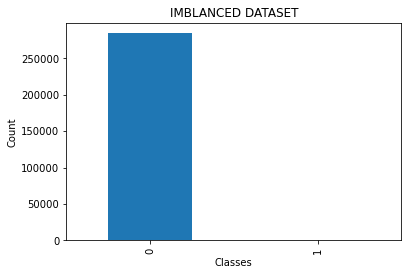

In [9]:
#Plotting a graph to see the difference visually
df1['Class'].value_counts().plot(kind='bar')
plt.ylabel('Count');
plt.xlabel('Classes');
plt.title('IMBLANCED DATASET')
plt.show()

##### Looking at the std we can see the Time and Amount are not scaled. All the other columns are scaled, therefore, this will create a problem as most of the models use Eucledian distance. Considering this Time and Amount should be scaled.

In [10]:
#Intializing the Standard Scaler and stroring it in the variable
scale = StandardScaler()

#Assigning Scaled Values to a variable
df1['scaledAmount'] = scale.fit_transform(df1['Time'].values.reshape(-1,1))
df1['scaledTime'] = scale.fit_transform(df1['Amount'].values.reshape(-1,1))

#Dropping the old variables
df1.drop(['Time','Amount'], axis=1, inplace= True)

#### Standard Scaling subtracts the mean from all the rows and then divide all the values with standard deviation. This make mean = 0 and standard deviation = 1. In another words, it standardize the data and arrange it in standard normal distribution.

In [11]:
#Checking the scaled variables
df1.loc[:,('scaledAmount', 'scaledTime')]

,scaledAmount,scaledTime
0,-1.996583,0.244964
1,-1.996583,-0.342475
2,-1.996562,1.160686
3,-1.996562,0.140534
4,-1.996541,-0.073403
...,...,...
284802,1.641931,-0.350151
284803,1.641952,-0.254117
284804,1.641974,-0.081839
284805,1.641974,-0.313249


##### Splitting into Train and Test sets

Splitting the data before dealing with the imbalance. This is a good practice as we will be making a balance on train data and then testing it on the original test set. This will make sure that we are checking our model according to the real world data.

### Creating a Class for doing above mentioned steps and fitting different models

In [12]:
#Creating a Class
class Model:
    #Making a constructor
    def __init__(self, datafile):
        self.df1 = pd.read_csv(datafile)
        self.df1 = self.df1.sample(50000)
        self.gnb = GaussianNB()
        self.random_forest = RandomForestClassifier()
        self.svc = SVC()
        
    #Creating a function to split the data
    def split(self, test_size):
        #If test size is none, it will take the deafult size
        if test_size == None:
            test_size = 0.25
        self.X = self.df1.drop('Class', axis =1)
        self.y = self.df1['Class']
        #Splitting the data into training and testing
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size = test_size, random_state = 29)
    
    #Creating a fucntion to balance the data with 3 different techniques
    def balancing(self, b_type): 
        #For SMOTE
        if b_type == 'SMOTE':
            self.sm = SMOTE(random_state=29)
            self.X_train_balanced, self.y_train_balanced = self.sm.fit_sample(self.X_train, self.y_train)

        #For Random Under Sampler
        elif b_type == 'UnderSample':
            #Using RandomUnderSampler for Under Sampling
            self.rs = RandomUnderSampler(random_state=292)
            #Assigning the re-sample data intp different variables
            self.X_train_balanced, self.y_train_balanced = self.rs.fit_sample(self.X_train,self.y_train)

        #For SMOTEENN
        elif b_type == 'Combined':
            self.smn = SMOTEENN(random_state=292)
            self.X_train_balanced, self.y_train_balanced = self.smn.fit_sample(self.X_train,self.y_train)
        
    #Fitting 3 different models
    def fit(self, m_type):
        #Making a Parameter Grid to use in GridSearchCV - Hyperparameter
        maxDepth = [x for x in range(10,20,10) ]
        maxDepth.append(None)
        minSamplesSplit = [2,3]
        minSamplesLeaf = [1, 2]
        self.params = { 'max_depth': maxDepth,
               'min_samples_split': minSamplesSplit,
               'min_samples_leaf': minSamplesLeaf,
               }
        self.svc_param = {'kernel': ['rbf'], 
                             'gamma': [1e-3, 1e-4],
                             'C': [1, 10, 100, 1000]}

        if m_type == 'RF':
            self.RF_random = GridSearchCV(self.random_forest, self.params, cv = 10, n_jobs = -1)
            # Fitting the model
            self.RF_random.fit(self.X_train_balanced, self.y_train_balanced)

        elif m_type == 'GNB':
            self.gnb.fit(self.X_train_balanced, self.y_train_balanced)

        elif m_type == 'SVC':
            self.svc_model = GridSearchCV(self.svc, self.svc_param, cv = 10, n_jobs = -1)
            self.svc_model.fit(self.X_train_balanced, self.y_train_balanced)
            

##### Dealing With Imblanced Data with Different Methods

## Random Forest

In [14]:
#Assigning the Model Class to a variable for Random Forest - SMOTE
rf_smote = Model("creditcard.csv")
#Assigning the Model Class to a variable for Random Forest - RandomUnderSampler
rf_rus = Model('creditcard.csv')
#Assigning the Model Class to a variable for Random Forest - Combined
rf_combined = Model('creditcard.csv')



In [16]:
#Assigning the Model Class to a variable for Naive Bayes - SMOTE
gnb_smote = Model("creditcard.csv")
#Assigning the Model Class to a variable for Naive Bayes - RandomUnderSampler
gnb_rus = Model('creditcard.csv')
#Assigning the Model Class to a variable for Naive Bayes - Combined
gnb_combined = Model('creditcard.csv')


In [17]:
#Assigning the Model Class to a variable for Linear SVC - SMOTE
svc_smote = Model("creditcard.csv")
#Assigning the Model Class to a variable for Linear SVC - RandomUnderSampler
svc_rus = Model('creditcard.csv')
#Assigning the Model Class to a variable for Linear SVC - Combined
svc_combined = Model('creditcard.csv')

### - SMOTE

1    37439
0    37439
Name: Class, dtype: int64


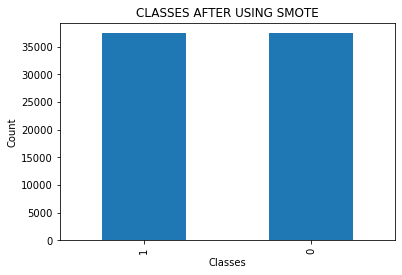

In [18]:
#Splitting the data
rf_smote.split(None)

#Balancing the Data USING SMOTE
rf_smote.balancing('SMOTE')

#Checking the target class 
print(rf_smote.y_train_balanced.value_counts())

#Plotting the classes to check if they are balanced
rf_smote.y_train_balanced.value_counts().plot(kind = 'bar')
plt.ylabel('Count');
plt.xlabel('Classes');
plt.title('CLASSES AFTER USING SMOTE')
plt.show()

#Fitting the model on Random Forest
rf_smote.fit('RF')

In [19]:
#Printing the test scores
print("Test score is "+str(rf_smote.RF_random.score(rf_smote.X_test,rf_smote.y_test)))
#Printing best parameters
print("Best parameters:"+str(rf_smote.RF_random.best_params_))
#Printing best score
print("Best grid search score:"+str(rf_smote.RF_random.best_score_))
#Printing best esitimator
print("Best estimator:"+str(rf_smote.RF_random.best_estimator_))

Test score is 0.99936
Best parameters:{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best grid search score:0.9998931588257254
Best estimator:RandomForestClassifier()


## - Random Under Sampler

1    54
0    54
Name: Class, dtype: int64


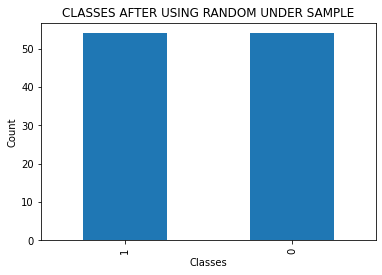

Test score is 0.98808
Best parameters:{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best grid search score:0.9072727272727275
Best estimator:RandomForestClassifier(max_depth=10)


In [20]:
#Splitting the data
rf_rus.split(None)

#Balancing the Data USING RandomUnderSampler
rf_rus.balancing('UnderSample')

#Checking the target class 
print(rf_rus.y_train_balanced.value_counts())

#Plotting the classes to check if they are balanced
rf_rus.y_train_balanced.value_counts().plot(kind = 'bar')
plt.ylabel('Count');
plt.xlabel('Classes');
plt.title('CLASSES AFTER USING RANDOM UNDER SAMPLE')
plt.show()

#Fitting the model on Random Forest
rf_rus.fit('RF')


#Printing the test scores
print("Test score is "+str(rf_rus.RF_random.score(rf_rus.X_test,rf_rus.y_test)))
#Printing best parameters
print("Best parameters:"+str(rf_rus.RF_random.best_params_))
#Printing best score
print("Best grid search score:"+str(rf_rus.RF_random.best_score_))
#Printing best esitimator
print("Best estimator:"+str(rf_rus.RF_random.best_estimator_))

### - Combined (SMOTEEEN)

1    33153
0    30376
Name: Class, dtype: int64


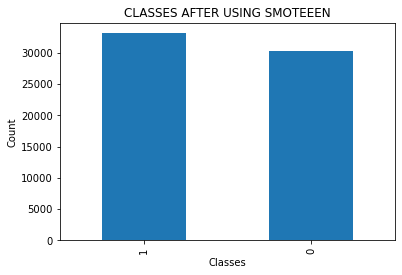

Test score is 0.99936
Best parameters:{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best grid search score:0.9998268509770073
Best estimator:RandomForestClassifier()


In [23]:
#Splitting the data
rf_combined.split(None)

#Balancing the Data USING SMOTEEEN
rf_combined.balancing('Combined')

#Checking the target class 
print(rf_combined.y_train_balanced.value_counts())

#Plotting the classes to check if they are balanced
rf_combined.y_train_balanced.value_counts().plot(kind = 'bar')
plt.ylabel('Count');
plt.xlabel('Classes');
plt.title('CLASSES AFTER USING SMOTEEEN')
plt.show()

#Fitting the model on Random Forest
rf_combined.fit('RF')


#Printing the test scores
print("Test score is "+str(rf_combined.RF_random.score(rf_combined.X_test,rf_combined.y_test)))
#Printing best parameters
print("Best parameters:"+str(rf_combined.RF_random.best_params_))
#Printing best score
print("Best grid search score:"+str(rf_combined.RF_random.best_score_))
#Printing best esitimator
print("Best estimator:"+str(rf_combined.RF_random.best_estimator_))

### Comparing Random Forest Model Scores

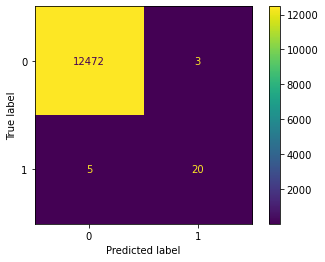

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12475
           1       0.87      0.80      0.83        25

    accuracy                           1.00     12500
   macro avg       0.93      0.90      0.92     12500
weighted avg       1.00      1.00      1.00     12500



In [24]:
# Confusion Matrix for SMOTE
plot_confusion_matrix(rf_smote.RF_random,rf_smote.X_test,rf_smote.y_test)
plt.show()
# Classification Report for SMOTE
y_pred_rf_smote = rf_smote.RF_random.predict(rf_smote.X_test)
print(classification_report(rf_smote.y_test, y_pred_rf_smote))

On SMOTE our model performed really well. We got 87% precision without much compromising the recall around 86%. Here overall we got 87% for Class 1.

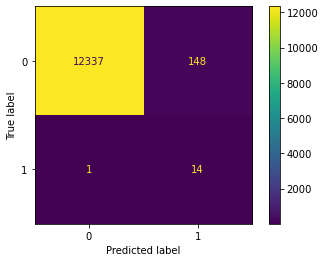

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     12485
           1       0.09      0.93      0.16        15

    accuracy                           0.99     12500
   macro avg       0.54      0.96      0.58     12500
weighted avg       1.00      0.99      0.99     12500



In [25]:
# Confusion Matrix for RandomUnderSampler
plot_confusion_matrix(rf_rus.RF_random,rf_rus.X_test,rf_rus.y_test)
plt.show()
# Classification Report for RandomUnderSampler
y_pred_rf_rus = rf_rus.RF_random.predict(rf_rus.X_test)
print(classification_report(rf_rus.y_test, y_pred_rf_rus))

Our model performed the worst in Under Sampling. As we discussed, we do not have enough samples for the minority class; therefore, it was not advisable to use Under Sampling. Here we can see we got 93% as Recall but only 0.06 as Precision. Overall, we got only 11% for Class 1.

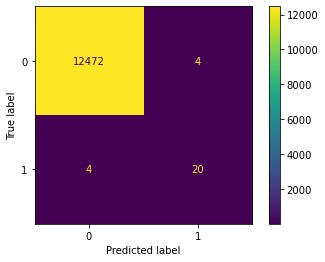

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12476
           1       0.83      0.83      0.83        24

    accuracy                           1.00     12500
   macro avg       0.92      0.92      0.92     12500
weighted avg       1.00      1.00      1.00     12500



In [26]:
# Confusion Matrix for SMOTEEEN
plot_confusion_matrix(rf_combined.RF_random,rf_combined.X_test,rf_combined.y_test)
plt.show()
# Classification Report for SMOTEEN
y_pred_rf_combined = rf_combined.RF_random.predict(rf_combined.X_test)
print(classification_report(rf_combined.y_test, y_pred_rf_combined))

After checking the combined approach, we can see there is not much difference in SMOTE and SMOTEENN. Still, we are sacrificing precision by 6%. F1-score is 84%.

As we can see from the above scores, we are getting the highest f1-score using SMOTE technique

## Naive Bayes

### - SMOTE

1    37446
0    37446
Name: Class, dtype: int64


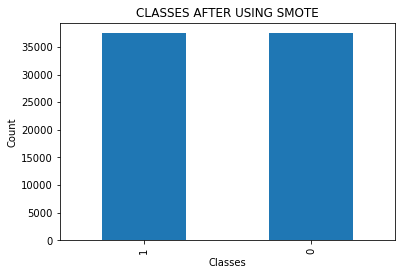

Test score is 0.98976


In [27]:
#Splitting the data
gnb_smote.split(None)

#Balancing the Data USING SMOTE
gnb_smote.balancing('SMOTE')

#Checking the target class 
print(gnb_smote.y_train_balanced.value_counts())

#Plotting the classes to check if they are balanced
gnb_smote.y_train_balanced.value_counts().plot(kind = 'bar')
plt.ylabel('Count');
plt.xlabel('Classes');
plt.title('CLASSES AFTER USING SMOTE')
plt.show()

#Fitting the model - Naive Bayes
gnb_smote.fit('GNB')


#Printing the test scores
print("Test score is "+str(gnb_smote.gnb.score(gnb_smote.X_test,gnb_smote.y_test)))

### - RandomUnderSampler

1    65
0    65
Name: Class, dtype: int64


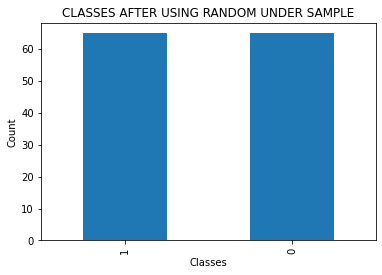

Test score is 0.98048


In [28]:
#Splitting the data
gnb_rus.split(None)

#Balancing the Data USING RANDOM UNDER SAMPLE
gnb_rus.balancing('UnderSample')

#Checking the target class 
print(gnb_rus.y_train_balanced.value_counts())

#Plotting the classes to check if they are balanced
gnb_rus.y_train_balanced.value_counts().plot(kind = 'bar')
plt.ylabel('Count');
plt.xlabel('Classes');
plt.title('CLASSES AFTER USING RANDOM UNDER SAMPLE')
plt.show()

#Fitting the model - Naive Bayes
gnb_rus.fit('GNB')


#Printing the test scores
print("Test score is "+str(gnb_rus.gnb.score(gnb_rus.X_test,gnb_rus.y_test)))

### - Combined (SMOTEEEN)

1    30115
0    27107
Name: Class, dtype: int64


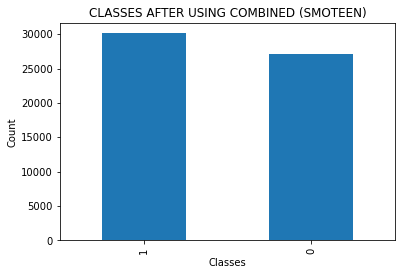

Test score is 0.99136


In [29]:
#Splitting the data
gnb_combined.split(None)

#Balancing the Data USING SMOTE
gnb_combined.balancing('Combined')

#Checking the target class 
print(gnb_combined.y_train_balanced.value_counts())

#Plotting the classes to check if they are balanced
gnb_combined.y_train_balanced.value_counts().plot(kind = 'bar')
plt.ylabel('Count');
plt.xlabel('Classes');
plt.title('CLASSES AFTER USING COMBINED (SMOTEEN)')
plt.show()

#Fitting the model on Random Forest
gnb_combined.fit('GNB')


#Printing the test scores
print("Test score is "+str(gnb_combined.gnb.score(gnb_combined.X_test,gnb_combined.y_test)))

### Comparing Naiye Bayes Model Scores

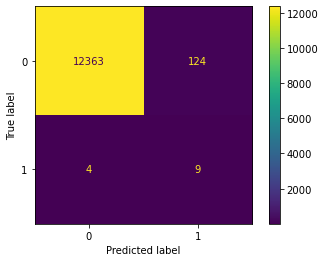

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     12487
           1       0.07      0.69      0.12        13

    accuracy                           0.99     12500
   macro avg       0.53      0.84      0.56     12500
weighted avg       1.00      0.99      0.99     12500



In [30]:
# Confusion Matrix for Naive Bayes - SMOTE
plot_confusion_matrix(gnb_smote.gnb,gnb_smote.X_test,gnb_smote.y_test)
plt.show()
# Classification Report for Naive Bayes - SMOTE
y_pred_gnb_smote = gnb_smote.gnb.predict(gnb_smote.X_test)
print(classification_report(gnb_smote.y_test, y_pred_gnb_smote))

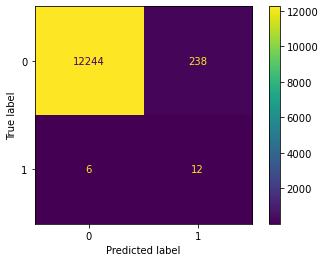

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     12482
           1       0.05      0.67      0.09        18

    accuracy                           0.98     12500
   macro avg       0.52      0.82      0.54     12500
weighted avg       1.00      0.98      0.99     12500



In [31]:
# Confusion Matrix for Naive Bayes - RandomUnderSampler
plot_confusion_matrix(gnb_rus.gnb,gnb_rus.X_test,gnb_rus.y_test)
plt.show()
# Classification Report forNaive Bayes -RandomUnderSampler
y_pred_gnb_rus = gnb_rus.gnb.predict(gnb_rus.X_test)
print(classification_report(gnb_rus.y_test, y_pred_gnb_rus))

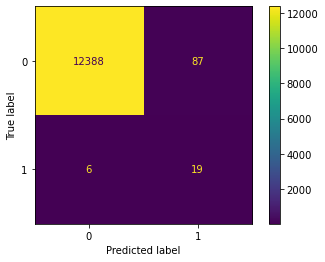

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     12475
           1       0.18      0.76      0.29        25

    accuracy                           0.99     12500
   macro avg       0.59      0.88      0.64     12500
weighted avg       1.00      0.99      0.99     12500



In [32]:
# Confusion Matrix for Naive Bayes -RandomUnderSampler
plot_confusion_matrix(gnb_combined.gnb,rf_smote.X_test,rf_smote.y_test)
plt.show()
# Classification Report for Naive Bayes -RandomUnderSampler
y_pred_rf_smote = gnb_combined.gnb.predict(rf_smote.X_test)
print(classification_report(rf_smote.y_test, y_pred_rf_smote))

We kept this model simple without any modification to check and compare with other models we are trying to achieve. As we can see all the scores for SMOTE, RANDOMUNDERSAMPLER and SMOTEENN respectively. We got a low score in all the methods. Best f1-score we got is 34% using SMOTEENN for Class 1. This could serve as our base model.

The worst score we got is using RandomUnderSampler .i.e. 0.03 for precision and  0.64 for recall. Overall (f1-score) is onl 0.06


## SVC

### - SMOTE

1    37417
0    37417
Name: Class, dtype: int64


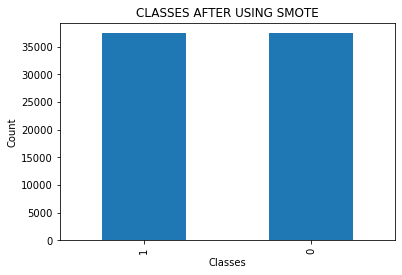

In [ ]:
#Splitting the data
svc_smote.split(None)

#Balancing the Data USING SMOTE
svc_smote.balancing('SMOTE')

#Checking the target class 
print(svc_smote.y_train_balanced.value_counts())

#Plotting the classes to check if they are balanced
svc_smote.y_train_balanced.value_counts().plot(kind = 'bar')
plt.ylabel('Count');
plt.xlabel('Classes');
plt.title('CLASSES AFTER USING SMOTE')
plt.show()

#Fitting the model on Random Forest
svc_smote.fit('SVC')


#Printing the test scores
print("Test score is "+str(svc_smote.svc_model.score(svc_smote.X_test,svc_smote.y_test)))
#Printing best parameters
print("Best parameters:"+str(svc_smote.svc_model.best_params_))
#Printing best score
print("Best grid search score:"+str(svc_smote.svc_model.best_score_))
#Printing best esitimator
print("Best estimator:"+str(svc_smote.svc_model.best_estimator_))

### - RandomUnderSampler

In [ ]:
#Splitting the data
svc_rus.split(None)

#Balancing the Data USING SMOTE
svc_rus.balancing('UnderSample')

#Checking the target class 
print(svc_rus.y_train_balanced.value_counts())

#Plotting the classes to check if they are balanced
svc_rus.y_train_balanced.value_counts().plot(kind = 'bar')
plt.ylabel('Count');
plt.xlabel('Classes');
plt.title('CLASSES AFTER USING RANDOM UNDER SAMPLE')
plt.show()

#Fitting the model on SVC
svc_rus.fit('SVC')


#Printing the test scores
print("Test score is "+str(svc_rus.svc_model.score(svc_rus.X_test,svc_smote.y_test)))
#Printing best parameters
print("Best parameters:"+str(svc_rus.svc_model.best_params_))
#Printing best score
print("Best grid search score:"+str(svc_rus.svc_model.best_score_))
#Printing best esitimator
print("Best estimator:"+str(svc_rus.svc_model.best_estimator_))

### - Combined (SMOTEEEN)

In [ ]:
#Splitting the data
svc_combined.split(None)

#Balancing the Data USING SMOTE
svc_combined.balancing('Combined')

#Checking the target class 
print(svc_combined.y_train_balanced.value_counts())

#Plotting the classes to check if they are balanced
svc_combined.y_train_balanced.value_counts().plot(kind = 'bar')
plt.ylabel('Count');
plt.xlabel('Classes');
plt.title('CLASSES AFTER USING SMOTEEEN')
plt.show()

#Fitting the model on SVC
svc_combined.fit('SVC')


#Printing the test scores
print("Test score is "+str(svc_combined.svc_model.score(svc_combined.X_test,svc_combined.y_test)))
#Printing best parameters
print("Best parameters:"+str(svc_combined.svc_model.best_params_))
#Printing best score
print("Best grid search score:"+str(svc_combined.svc_model.best_score_))
#Printing best esitimator
print("Best estimator:"+str(svc_combined.svc_model.best_estimator_))

### Comparing Linear SVC Model Scores

In [ ]:
# Confusion Matrix for Linear SVC - SMOTE
plot_confusion_matrix(svc_smote.svc_model,svc_smote.X_test,svc_smote.y_test)
plt.show()
# Classification Report for Linear SVC - SMOTE
y_pred_svc_smote = svc_smote.svc_model.predict(svc_smote.X_test)
print(classification_report(svc_smote.y_test, y_pred_svc_smote))

In [ ]:
# Confusion Matrix for Linear SVC - RandomUnderSample
plot_confusion_matrix(svc_rus.svc_model,svc_rus.X_test,svc_rus.y_test)
plt.show()
# Classification Report for Linear SVC - RandomUnderSample
y_pred_svc_rus = svc_rus.svc_model.predict(svc_rus.X_test)
print(classification_report(svc_rus.y_test, y_pred_svc_rus))

In [ ]:
# Confusion Matrix for Linear SVC - SMOTEEEN
plot_confusion_matrix(svc_combined.svc_model,svc_combined.X_test,svc_combined.y_test)
plt.show()
# Classification Report for Linear SVC - SMOTEEEN
y_pred_svc_combined = svc_combined.svc_model.predict(svc_combined.X_test)
print(classification_report(svc_combined.y_test, y_pred_svc_combined))

# Discussion

##### Globally, credit and debit card fraud transaction leads in losses amounting $21.54 billion (Nilson Report, October 2016), which is roughly increasing 6% every year. Credit card fraud is one of the main concerns of the users. The main hindrance in modelling fraud detection system is there are only 1% fraud transactions of all the transactions and identifying them in real-time is also a task as false positive can create an unpleasant experience for the customers. 
##### We saw above how to solve the imbalance of the data and find which model suits our dataset. It depends on our dataset that which technique to use. Comparing it to our benchmark, we got comparable results; however, we got the best results in SMOTE taking f1-score into consideration compared to others. 
##### Our results were comparable with the benchmark we set earlier. We can further train the data on more parameters given the time and resources.  As we got the best result through Random Forest, it can be saved using Pickle library and can be tested in the real world. 
##### Solving Credit Card Fraud detection was our main concern and drive of this project; considering all this Machine Learning and AI comes in. After creating a model, we can deploy it in the real world. This would help the business as well the customers to stop the fraudulent transactions in real-time. Which in turn reduce the insurance and company losses faced each year.


# Consclusion


##### Working with imbalanced data could be really challenging if not deal properly. It can hinder model predictivity; moreover, it could also be deceptive in terms of accuracy. In imbalanced data, Classification Report plays a vital role. Therefore, one must check Precision, Recall and F1- score before moving forward with there findings. 
##### We also saw precision and recall trad-off is inevitable and could be crucial according to the dataset and business goal. RandomUnderSampler was the worst techniques for our dataset and it is not recommended to use Under Sampling if the number of samples in the minority class is not enough. The best techniques we found was Over Sample for this dataset. Still, SMOTEENN was also comparable and could be tried with more data. Lastly, we saw that according to our dataset, SMOTE, RandomUnderSampler or SMOTEENN methods could be used for balancing the data. 
